In [341]:
import pandas as pd
import sys
from datetime import datetime
from datetime import timedelta,date
import numpy as np
import os

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from patsy import dmatrices
from scipy.stats import pearsonr
import seaborn as sns
from patsy import dmatrix, demo_data, ContrastMatrix, Poly
import calendar
import matplotlib.pyplot as plt



In [298]:
len(dataAll['hospital_tag'].unique())

1611

In [342]:
#read data incentive
dataAll = pd.read_csv('/Users/xiaominli/Documents/habitPCS/data_all/onlyInterventionPeopleIncentive_allAUCwithD.csv',engine='python')
coefData = pd.read_csv('/Users/xiaominli/Documents/habitPCS/allCoefLasso_incentive.csv',engine='python')
aucs = pd.read_csv('/Users/xiaominli/Documents/habitPCS/data_all/auc_preint_allAUC_incentive.csv',engine='python')

In [336]:
#read data leadership
dataAll = pd.read_csv('/Users/xiaominli/Documents/habitPCS/data_all/onlyInterventionPeopleLeadership_allwithDJune24.csv',engine='python')
coefData = pd.read_csv('/Users/xiaominli/Documents/habitPCS/allCoefLasso_leadership_June24.csv',engine='python')
aucs = pd.read_csv('/Users/xiaominli/Documents/habitPCS/data_all/auc_preint_allAUC_leadership_june24.csv',engine='python')

In [24]:
dataAll['whetherAfterPrevention']= dataAll['whetherAfterPrevention'].apply(lambda x: Whether[x])
Whether = {True: 1, False: 0}


In [343]:
len(dataAll['hospital_tag'].unique())

1611

In [34]:
df = dataAll[dataAll['hospital_tag'] <40]

In [322]:
len(aucs)

1455

In [323]:
len(coefData)

1455

In [123]:
dataAll['whetherAfterPrevention'] = pd.to_datetime(dataAll['datetime'])>pd.to_datetime(dataAll['preventionDate'])

In [283]:
len(dataAll['hospital_tag'].unique()) 
#total people: 1050, people with intervention:

1611

In [349]:
906-878

28

In [346]:
df.shape

(906, 3)

In [348]:
df.shape

(878, 3)

In [344]:
#lassoCoefs
allIds = aucs['hospital_tag'].unique()
useIds = list()
coefs = list()
interventionAUC = list()
meanCompliance = list()
aucAll = list()
beforeLength=list()
totalList = list()
counter = 0
errorId = list()
for personId in allIds:
    dataPerson = dataAll[dataAll['hospital_tag']==personId]
    #if dataPerson.shape[0]<30:
        #continue
    #y, X = dmatrices('compliant ~ whetherAfterPrevention+experience', dataPerson, return_type = 'dataframe')
    #if y['compliant'].mean()<0.03:
        #continue
    a = dataPerson[dataPerson['whetherAfterPrevention']==False].reset_index()
    b = dataPerson[dataPerson['whetherAfterPrevention']==True].reset_index()
    if len(b)<5:
        continue
    if len(a)<5:
        continue
#     if len(b)<10:
#         continue
#     if len(a)<1:
#         continue
    meanCompliance.append(a['compliant'].mean())
    aucPerson = aucs.loc[aucs['hospital_tag']==personId, 'auc_preint'].values[0]
    coefPerson = coefData.loc[coefData['hospital_tag']==personId, 'intervention_coef'].values[0]
    interventionAUC.append(aucPerson)
    coefs.append(coefPerson)

In [347]:
d = { 'coefs': coefs,'AUC':interventionAUC}

df = pd.DataFrame(data=d)
df = pd.DataFrame(data=d)
df = df[df['coefs']>df['coefs'].mean()-3*df['coefs'].std()]
df = df[df['coefs']<df['coefs'].mean()+3*df['coefs'].std()]
for iterr,row in df.iterrows(): 
    if row['coefs']>0:
        df.at[iterr,'newDummy'] = int(1)
        continue
    df.at[iterr,'newDummy'] = int(0)
#df = df[df['coefs']>df['coefs'].quantile(q=0.1)]
#df = df[df['coefs']<df['coefs'].quantile(q=0.9)]

In [333]:
d = { 'coefs': coefs,'AUC':interventionAUC}

df = pd.DataFrame(data=d)
df = pd.DataFrame(data=d)

In [340]:
df.shape

(1396, 3)

In [3]:
df.shape

(878, 4)

In [305]:
df = df[df['coefs']!=0]


In [2]:
df=pd.read_csv('finalTableIncentive.csv')

In [330]:
df.to_csv('finalTableIncentive.csv')

In [249]:
df['coefs'].median()

0.0

In [331]:
df =pd.read_csv('finalTableIncentive.csv')

In [6]:
y_coef, X_auc = dmatrices('abs(coefs)~ AUC', df, return_type = 'dataframe')
X_auc = sm.add_constant(X_auc)
model = sm.OLS(y_coef,X_auc)
results = model.fit()
print(results.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.013     
Dependent Variable: abs(coefs)       AIC:                -1915.5478
Date:               2021-07-07 11:43 BIC:                -1905.9925
No. Observations:   878              Log-Likelihood:     959.77    
Df Model:           1                F-statistic:        12.68     
Df Residuals:       876              Prob (F-statistic): 0.000390  
R-squared:          0.014            Scale:              0.0065922 
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
Intercept   -0.0602     0.0262   -2.2940   0.0220   -0.1117   -0.0087
AUC          0.1179     0.0331    3.5608   0.0004    0.0529    0.1829
-------------------------------------------------------------------
Omnibus:             653.936       Durbin-Watson:       

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2608: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [943]:
#for all people run logit model, overall effect, use preinterventionModel
allIds = dataAll['hospital_tag'].unique()
useIds = list()
coefs = list()
interventionAUC = list()
meanCompliance = list()
aucAll = list()
beforeLength=list()
totalList = list()
counter = 0
errorId = list()
for personId in allIds:
    dataPerson = dataAll[dataAll['hospital_tag']==personId]
    #if dataPerson.shape[0]<30:
        #continue
    #y, X = dmatrices('compliant ~ whetherAfterPrevention+experience', dataPerson, return_type = 'dataframe')
    y, X = dmatrices('compliant ~ whetherAfterPrevention+epi_id  + lag_compliant +experience+' 
                     'patient_encounter:time_elapsed + opposite_compliant + hour_slot+' 
                     'unit_prev_freq  + dow_prev_freq +'                   
                     'loc_prev_freq +others_mean_in_loc +'
                     'lag_compliant:time_since_last_opp + entry_indicator*lag_compliant +'
                     'time_off +streak + month'
                     ,dataPerson,return_type = 'dataframe')
    if y['compliant'].mean()<0.03:
        continue
    a = dataPerson[dataPerson['whetherAfterPrevention']==False].reset_index()
    b = dataPerson[dataPerson['whetherAfterPrevention']==True].reset_index()
    if len(b)<10:
        continue
    if len(a)==0:
        continue      
    if aucs[aucs['hospital_tag']==personId].shape[0]==0:
        continue   
    logit_model=sm.Logit(y,X)
    try:
        result=logit_model.fit()
    except:
        errorId.append(personId)    #aucAll.append(a['habit_lv_A'][len(a)-1])
    aucPerson = aucs.loc[aucs['hospital_tag']==personId, 'auc_preint'].values[0]    
    interventionAUC.append(aucPerson)
    coefs.append(result.params['whetherAfterPrevention[T.True]'])
    useIds.append(personId)
    meanCompliance.append(a['compliant'].mean())
    beforeLength.append(len(a))
    totalList.append(len(dataPerson))
    counter = counter +1
#     if counter>20:
#         break

Optimization terminated successfully.
         Current function value: 0.518912
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.407350
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.380764
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.232889
         Iterations 8
         Current function value: 0.541771
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.418165
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.378272
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.550755
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.291656
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.240152
         Iterations 8
         Current function value: 0.185692
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.477082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304556
         Iterations 8
         Current function value: 0.410496
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.418112
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302377
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.576433
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.487314
         Iterations 7
         Current function value: 0.411683
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.343111
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.352752
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.205141
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.545513
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.552259
         Iterations 7
         Current function value: 0.291613
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.152724
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.463670
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.445911
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.515869
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.568061
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.363719
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.218667
         Iterations 12
         Current function value: 0.120275
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.573548
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.412402
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.514204
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.479104
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.503323
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.517926
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.481665
         Iterations 7
         Current function value: 0.509076
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.478300
         Iterations 6


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.437729
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.567726
         Iterations 6
         Current function value: 0.405559
         Iterations: 35
         Current function value: inf
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: inf
         Iterations: 35
         Current function value: 0.382912
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.262561
         Iterations 7
         Current function value: 0.504365
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.527055
         Iterations 6


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.386734
         Iterations: 35
         Current function value: 0.285687
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.520185
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.492924
         Iterations 6
         Current function value: 0.522591
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.633556
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.443918
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.531827
         Iterations 6
         Current function value: 0.055513
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.287664
         Iterations 8


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.546223
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.418934
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.492864
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.490655
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.481173
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401247
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.454780
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.437123
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.360672
         Iterations 8
         Current function value: 0.562523
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.393420
         Iterations 7
         Current function value: 0.285802
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.356398
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.456265
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.479402
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.238005
         Iterations 8
         Current function value: 0.389623
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.476835
         Iterations 6
         Current function value: 0.560981
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.554287
         Iterations 7


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.411765
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340677
         Iterations 7
         Current function value: 0.439485
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.452700
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.435501
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.470199
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.518607
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.504949
         Iterations 6
         Current function value: 0.446739
         Iterations: 35
         Current function value: 0.192151
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.516834
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.317492
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.444134
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.505588
         Iterations 6
         Current function value: 0.346173
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.486351
         Iterations 7


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.480803
         Iterations 7
         Current function value: 0.214170
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.345772
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.467699
         Iterations 6


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.553536
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.523154
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.486758
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.481880
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.334910
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.392153
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.617759
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.519398
         Iterations 6
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.431789
         Iterations 7
         Current fun

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.535954
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.436131
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.594327
         Iterations 6
         Current function value: 0.583322
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.352856
         Iterations 7


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.536885
         Iterations 30
Optimization terminated successfully.
         Current function value: 0.495332
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.462307
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.437890
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.581358
         Iterations 6
         Current function value: 0.575668
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.500262
         Iterations 6


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.275789
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.224637
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.543601
         Iterations 7


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.347264
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.452657
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.520512
         Iterations 7
         Current function value: 0.144147
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.307747
         Iterations 8


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.372235
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.538723
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.474875
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.537093
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.500959
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.489489
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.555158
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.533003
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.477912
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.477416
         Iterations 6
Optimization ter

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.329553
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.533422
         Iterations 6
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.545347
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.287722
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.561597
         Iterations 6
         Current function value: 0.395236
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.112777
         Iterations 9


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.571732
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.322047
         Iterations 8
         Current function value: 0.366054
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.390550
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.387348
         Iterations 7
         Current function value: 0.286082
         Iterations: 35
         Current function value: 0.489183
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.476660
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.354551
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.426515
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.344786
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.454712
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.472335
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.368191
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.519666
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389503
         Iterations 8
         Current function value: 0.309898
         Iterations: 35
Optimization ter

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.268545
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.437499
         Iterations 6


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.268613
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.539589
         Iterations 7
         Current function value: 0.379727
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.522250
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.266232
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.442529
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.481153
         Iterations 6
         Current function value: 0.411504
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.527994
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.448237
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.362820
         Iterations 9
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.408587
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.477681
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.567603
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.393584
         Iterations 7
         Current function value: 0.505380
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.573124
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.465310
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.505184
         Iterations 7
         Current function value: 0.506408
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.479103
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.331559
         Iterations 8
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.327068
         Iterations 8
         Current function value: 0.285688
         Iterations: 35
         Current function value: 0.124513
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.333953
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.594767
         Iterations 6


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.530344
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.527083
         Iterations 6
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.635260
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.506079
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.484421
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.357645
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.575644
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591685
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.286545
         Iterations 8
         Current fun

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.406967
         Iterations 7
         Current function value: 0.297378
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.532718
         Iterations 6
         Current function value: 0.547398
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.474581
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.327386
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.546425
         Iterations 6
         Current function value: 0.300081
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.634921
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.367110
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.316396
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.631855
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.448280
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.145571
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.487003
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.535709
         Iterations 7
         Current function value: inf
         Iterations: 35
         Current function value: 0.390308
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.335048
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.171095
         Iterations 11
         Current function value: 0.517833
         Iterations: 35
         Current function value: 0.300753
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.552462
         Iterations 7
         Current function value: 0.379820
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.522678
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565255
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.340914
         Iterations 7
         Current function value: 0.383061
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.398767
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.574078
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593450
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.640745
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597467
         Iterations 6
         Current function value: 0.312172
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.550679
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449004
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.434633
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.639628
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.616062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.376706
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.602786
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545180
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.642369
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.665669
  

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.412282
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.418110
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.310698
         Iterations 8
         Current function value: 0.129611
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.255053
         Iterations 9


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.431418
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.501056
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.543971
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.553618
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.533598
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566299
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.482732
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.439189
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.558763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.335891
  

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.637178
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.474961
         Iterations 7


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.502033
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586914
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.456080
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.525185
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.618380
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.423136
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.593158
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.631410
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657132
         Iterations 6
         Current function value: 0.562768
         Iterations: 35
Optimization ter

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.448893
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.490703
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.678172
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.618605
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.550138
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.500383
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.529800
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.641593
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.536917
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.313083
  

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.403353
         Iterations 9
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.575726
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.182076
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.397825
         Iterations 7
         Current function value: 0.247387
         Iterations: 35
         Current function value: inf
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.507978
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.632757
         Iterations 7
         Current function value: 0.182694
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.235797
         Iterations 34
         Current function value: 0.243664
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.554635
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.247384
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287089
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.512195
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489327
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.496827
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.507941
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.224998
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.434233
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.371492
         Iterations 7
         Curren

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.532254
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.517933
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.313600
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.551162
         Iterations 7
         Current function value: 0.548941
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.366763
         Iterations 7


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.521802
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.486142
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.423985
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.391014
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.538700
         Iterations 8
         Current function value: 0.412493
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.461040
         Iterations 17
         Current function value: 0.538290
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.555265
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.507307
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.487608
         Iterations 22
         Current function value: 0.110624
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.518701
         Iterations 24


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.491463
         Iterations 6
         Current function value: 0.530555
         Iterations: 35
         Current function value: 0.192409
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.605028
         Iterations: 35
         Current function value: 0.433554
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.416260
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.512196
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.525437
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.557648
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.545172
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.641201
         Iterations 5
         Current function value: 0.525109
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.555884
         Iterations 6
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.448988
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.582540
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.311972
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.572061
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.561509
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.436507
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.437615
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.384321
         Iterations 7
         Current func

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.383209
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.588045
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.619195
         Iterations 6
         Current function value: 0.247651
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.342025
         Iterations 11


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.468583
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.549257
         Iterations 6


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.515246
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.508028
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.352913
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.557558
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.447913
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573561
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.419451
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.537539
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.461820
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.430340
  

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.285591
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.573452
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.519750
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.514780
         Iterations 6
         Current function value: 0.326494
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.625793
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.561734
         Iterations 17


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.515567
         Iterations 6
         Current function value: 0.466363
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.553766
         Iterations 6


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.597488
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.452086
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.541860
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.515879
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.353117
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.467082
         Iterations 8
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: 0.460263
         Iterations: 35
         Current function value: 0.500239
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.362686
         Iterations: 35
         Current function value: 0.518967
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.245415
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.495004
         Iterations 7


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.265723
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.507786
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.487985
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.409818
         Iterations 6
         Current function value: 0.566671
         Iterations: 35
         Current function value: 0.584688
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.529176
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.510320
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.543938
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.513469
         Iterations 6
         Current function value: 0.445202
         Iterations: 35
         Current function value: 0.627748
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.569688
         Iterations 23
         Current function value: 0.588611
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.540606
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.493993
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.492647
         Iterations 16


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.288911
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.454275
         Iterations 32


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.504203
         Iterations: 35
         Current function value: 0.443760
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.558792
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.452684
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.553202
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.247340
         Iterations 8
         Current function value: 0.432063
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.542894
         Iterations 29
         Current function value: 0.537957
         Iterations: 35
         Current function value: 0.414159
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.561135
         Iterations 6


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.583369
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.557900
         Iterations 6


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: inf
         Iterations: 35
         Current function value: 0.355829
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.482250
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.482656
         Iterations 6
         Current function value: 0.523628
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.195393
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.313474
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.461383
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.512204
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.553342
         Iterations 6
         Current function value: 0.483507
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.629766
         Iterations 5


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.511325
         Iterations 6
         Current function value: 0.573367
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.632334
         Iterations 5


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.425450
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566122
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603335
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587707
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.522692
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587563
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.428291
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.555683
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.619745
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.584252
  

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.577537
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.412135
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.550671
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.504088
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.439601
         Iterations 7
         Current function value: 0.519310
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.527918
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.557614
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583439
         Iterations 6
         Current function value: 0.500789
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.566277
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.572476
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.518065
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564675
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.631793
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.494153
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.530702
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.534916
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.301227
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.612876
  

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.389200
         Iterations: 35
         Current function value: 0.504926
         Iterations: 35
         Current function value: 0.532229
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.432853
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.445567
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.605699
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.559355
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594483
         Iterations 7
         Current function value: 0.590932
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.605936
         Iterations 6


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.465537
         Iterations 7
         Current function value: 0.421130
         Iterations: 35
         Current function value: 0.496961
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.560475
         Iterations: 35
         Current function value: 0.376776
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.533089
         Iterations 8
         Current function value: 0.512449
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.522079
         Iterations 7
         Current function value: 0.613865
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.533594
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.548911
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570331
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.393578
         Iterations 7
         Current function value: 0.439035
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.228087
         Iterations 8
         Current function value: 0.476161
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.287337
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.293220
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280052
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.555604
         Iterations 6
         Current function value: 0.508278
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.427602
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339048
         Iterations 7
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.354532
         Iterations 7
         Current function value: 0.200564
         Iterations: 35
         Current function value: 0.164657
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.324548
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.282225
         Iterations 8
         Current function value: 0.458048
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.218878
         Iterations 19


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.397984
         Iterations 6
         Current function value: 0.609368
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.441257
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.617924
         Iterations 6
         Current function value: 0.520137
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.486854
         Iterations 6
         Current function value: 0.215388
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.595898
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.352296
         Iterations 7
         Current function value: 0.443148
         Iterations: 35
         Current function value: 0.476726
         Iterations: 35
         Current function value: 0.210050
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: inf
         Iterations: 35
         Current function value: 0.444128
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.387996
         Iterations 7
         Current function value: 0.413224
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.239372
         Iterations 8


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.456403
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.483557
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.329621
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.536760
         Iterations 6
         Current function value: 0.408872
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.408867
         Iterations 7


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.258054
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.330664
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.432028
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.415345
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.264264
         Iterations 24
Optimization terminated successfully.
         Current function value: 0.268988
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.418151
         Iterations 7
         Current function value: 0.467423
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.420425
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.184705
         Iterations 8
         Current function value: 0.517678
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.497796
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.556106
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.509341
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.586628
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.360691
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.596391
         Iterations 5
         Current function value: 0.566695
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.330091
         Iterations 8


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.613124
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.435477
         Iterations 26
         Current function value: 0.537007
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.604827
         Iterations 7


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.576252
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.622190
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.635418
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.474701
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.603332
         Iterations 6
         Current function value: 0.412816
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.620899
         Iterations 31
Optimization terminated successfully.
         Current function value: 0.507700
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.381272
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.585352
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.620462
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595049
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.639300
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.651761
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627730
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.379204
 

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.429558
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.549029
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.450082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.467190
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605941
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.637009
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.527160
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.505877
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.617176
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.597124
  

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.535262
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.576881
         Iterations 6


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.559297
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.619621
         Iterations 5


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.592884
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.555503
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579904
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.413772
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.633095
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.523241
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529131
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.498196
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.596021
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.464863
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.593827
  

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.383701
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.480378
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.424021
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.507027
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.515238
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.354968
         Iterations 8
         Current function value: 0.610895
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.582087
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603250
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615219
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.614901
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.587834
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.472310
         Iterations 7
         Current function value: 0.550664
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.529474
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.528542
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.461187
         Iterations 7
         Current function value: 0.633210
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.654919
         Iterations 5


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.606513
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.620806
         Iterations 5
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.643576
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.613218
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605609
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.634088
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.551854
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.647138
         Iterations 5
Optimization terminated successfully.
         Current functio

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.631955
         Iterations 5
         Current function value: 0.587595
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.577745
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.654511
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657876
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.628983
         Iterations 5
         Current function value: 0.655506
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.592284
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.636635
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625385
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610205
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.252464
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.634644
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.659207
         Iterations 5
         Current function value: 0.572568
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.596638
         Iterations 5


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.440972
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.470158
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.472521
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298473
         Iterations 8
         Current function value: 0.115031
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.617141
         Iterations: 35
         Current function value: 0.556013
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.624963
         Iterations 5
         Current function value: 0.331710
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.524783
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.656805
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.641754
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608215
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.517772
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.438948
         Iterations 9
         Current function value: 0.280155
         Iterations: 35
         Current function value: 0.339946
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.561187
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.393698
         Iterations 7
         Current function value: 0.313412
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.539384
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.194657
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.388564
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.415739
         Iterations 8
         Current function value: 0.443375
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.585289
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.434700
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.452888
         Iterations 6
         Current function value: 0.339306
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.662055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.173919
         Iterations 11
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.467270
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.585660
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.643450
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.631494
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.527557
         Iterations 6
         Current function value: 0.350467
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.450942
         Iterations 7


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.578667
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591964
         Iterations 24
Optimization terminated successfully.
         Current function value: 0.431839
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.536825
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.528219
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.396261
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.460029
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.215436
         Iterations 34
         Current function value: 0.267420
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.493938
         Iterations 7
         Current function value: 0.569310
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.453935
         Iterations 6


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.522944
         Iterations: 35
         Current function value: 0.321976
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.362044
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.506906
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.607886
         Iterations 5


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.247759
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.640941
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.432051
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.641574
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573399
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580001
         Iterations 6
         Current function value: 0.365838
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.452296
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.527905
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.445505
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449780
         Iterations 6
         Current function value: 0.479026
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.602810
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.471500
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.518897
         Iterations 6
         Current function value: 0.426231
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.430379
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.517656
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.359598
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280542
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.461345
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.556674
         Iterations 5
         Current function value: 0.534104
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.319378
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.587313
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.622539
         Iterations 5
         Current function value: 0.349207
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.508114
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558321
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.571409
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.474289
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.533276
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.485927
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.457059
         Iterations 6
         Current function value: 0.447166
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.572772
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.263214
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.581608
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.454926
         Iterations 7
         Current function value: 0.513492
         Iterations: 35
         Current function value: 0.167056
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.418035
         Iterations: 35
         Current function value: 0.394416
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.368287
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.327406
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.563015
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.382364
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.271909
         Iterations 7
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.540064
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529587
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.462775
         Iterations 6
 

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: inf
         Iterations: 35
         Current function value: 0.370338
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.232617
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.582521
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579739
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.560211
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.555990
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611655
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565951
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.626451
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552934
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.509546
         Iterations 7
Optimization terminat

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.597737
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.609308
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.534883
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.461839
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.522338
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610662
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.496398
         Iterations 6
         Current function value: 0.533815
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.613497
         Iterations 6
         Current function value: 0.573215
         Iterations: 35
         Current function value: 0.445161
         Iterations: 35


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.480601
         Iterations 6
         Current function value: 0.576155
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.614279
         Iterations 6
         Current function value: 0.266994
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.600832
         Iterations 7


/Users/xiaominli/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.549792
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.634237
         Iterations 6
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.522003
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.490617
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.524416
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.437257
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.601884
         Iterations 6
         Current function value: inf
         Iterations: 35


In [944]:
#d = {'userId': useIds, 'coefs': coefs,'AUC':interventionAUC,'compliance':meanCompliance,'AUCall':aucAll,'beforeLength':beforeLength,'totalLength':totalList}
d = {'userId': useIds, 'coefs': coefs,'AUC':interventionAUC,'compliance':meanCompliance,'beforeLength':beforeLength,'totalLength':totalList}

df = pd.DataFrame(data=d)
#df = df[df['coefs']>df['coefs'].mean()-3*df['coefs'].std()]
#df = df[df['coefs']<df['coefs'].mean()+3*df['coefs'].std()]

df = df[df['coefs']>df['coefs'].quantile(q=0.1)]
df = df[df['coefs']<df['coefs'].quantile(q=0.9)]
#df = df[df['compliance']<0.3]
#df = df[df['coefs']<0]
#df = df[df['coefs']>-7]

In [206]:
df.shape

(1390, 3)

In [920]:
pearsonr(X['whetherAfterPrevention[T.True]'],X['experience'])

(0.8697006696861689, 0.0)

In [573]:
df['aboveMedian'] = df['AUC']>df['AUC'].quantile(q=0.5)
df['belowMedian'] = df['AUC']<df['AUC'].quantile(q=0.5)

In [254]:
corr, p = pearsonr(df['newDummy'], df['AUC'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.086


In [255]:
p

0.018950695693371735

In [140]:
df['coefAbs']=np.abs(df['coefs'])

In [142]:
df.shape

(2135, 4)

In [600]:
df['AUC'].mean()

0.7997906445228649

In [ ]:
sns.scatterplot(data=df, x="AUC", y="coefs")
#x label is compliances before intervention

In [505]:
df['multiAll']=df['AUCall']*df['compliance']

In [88]:
df1 = df[df['coefs']==0]
df1.shape

(1189, 3)

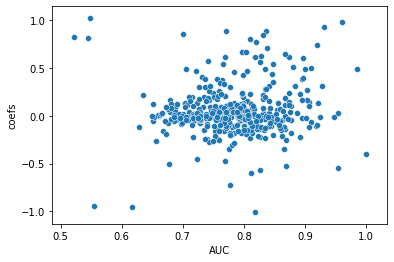

In [263]:
sns.scatterplot(data=df, x="AUC", y="coefs")
#x label is compliances before intervention

sns.scatterplot(data=df, x="compliance", y="coefs")
#x label is compliances before intervention

In [ ]:
hourSlotDict = {0: "hour_slot_0", 1: "hour_slot_1",2: "hour_slot_2", 3: "hour_slot_3"}
hourSlotDict[0]
dataAll['time_since_last_opp2']= dataAll['time_since_last_opp'].apply(lambda x: pow(x,2))
dataAll['time_off2']= dataAll['time_off'].apply(lambda x: pow(x,2))
dataAll['hour_slot']= dataAll['hour_slot'].apply(lambda x: hourSlotDict[x])
dataAll['time_since_last_compliant2']= dataAll['time_since_last_compliant'].apply(lambda x: pow(x,2))

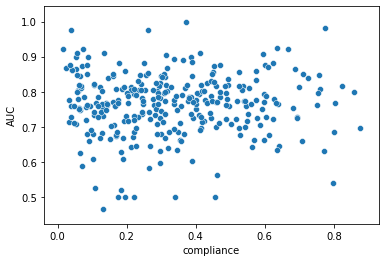

In [368]:
sns.scatterplot(data=df, x="compliance", y="AUC")
#x label is compliances before intervention

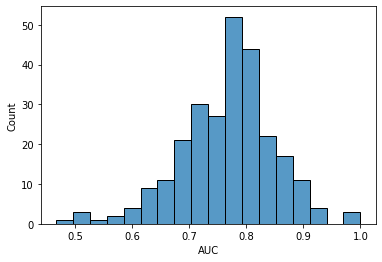

In [511]:
sns.histplot(data=df, x="AUC")